           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                                 17.61                              84.12   

   Temperature at 2 Meters (C)  Yield  
0                        26.01  11560  
1                        26.11  11253  
2                        26.24   9456  
3                        25.56   9321  
4                        25.76   8800  
Regressão Linear - R

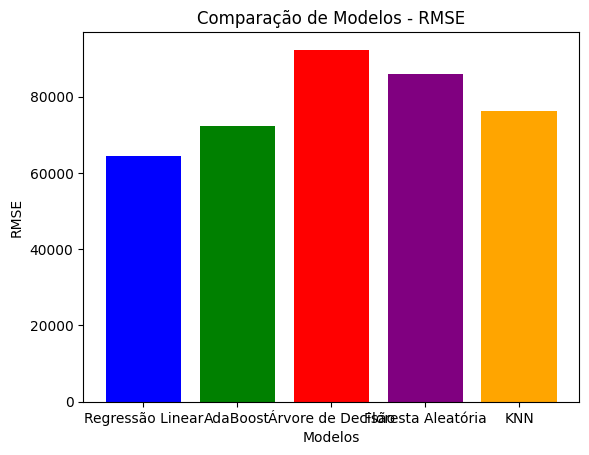

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Carregar o arquivo CSV
data = pd.read_csv("crop_yield.csv")

# Visualizar as primeiras linhas do dataset
print(data.head())

# A variável dependente (target) é o "Yield"
X = data[['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
          'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']]
y = data['Yield']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados (escala de 0 a 1 para melhorar o desempenho de alguns algoritmos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Construir e treinar os modelos
# Regressão Linear
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_lr = linear_regressor.predict(X_test_scaled)

# Avaliar o modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regressão Linear - RMSE: {rmse_lr}, R²: {r2_lr}")


# AdaBoost
adaboost = AdaBoostRegressor(n_estimators=50, random_state=42)
adaboost.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_ab = adaboost.predict(X_test_scaled)

# Avaliar o modelo
mse_ab = mean_squared_error(y_test, y_pred_ab)
rmse_ab = np.sqrt(mse_ab)
r2_ab = r2_score(y_test, y_pred_ab)

print(f"AdaBoost - RMSE: {rmse_ab}, R²: {r2_ab}")


# Árvore de Decisão
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_dt = decision_tree.predict(X_test_scaled)

# Avaliar o modelo
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Árvore de Decisão - RMSE: {rmse_dt}, R²: {r2_dt}")

# Floresta Aleatória
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_rf = random_forest.predict(X_test_scaled)

# Avaliar o modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Floresta Aleatória - RMSE: {rmse_rf}, R²: {r2_rf}")

# K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_knn = knn.predict(X_test_scaled)

# Avaliar o modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors - RMSE: {rmse_knn}, R²: {r2_knn}")


# Visualização dos resultados
models = ['Regressão Linear', 'AdaBoost', 'Árvore de Decisão', 'Floresta Aleatória', 'KNN']
rmse_values = [rmse_lr, rmse_ab, rmse_dt, rmse_rf, rmse_knn]

plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Modelos')
plt.ylabel('RMSE')
plt.title('Comparação de Modelos - RMSE')
plt.show()
